# CART Decision Tree Modeling for Heart Failure Prediction
This notebook explores the Classification and Regression Tree (CART) decision tree model using the heart failure clinical records dataset. We will walk through data loading, preprocessing, model training, hyperparameter tuning, and performance evaluation

In [61]:
# Importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree

In [62]:
# Loading the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [63]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [64]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Splitting Features and Target Variable

In [65]:
X = df.drop(columns=['DEATH_EVENT', 'time'])
y = df['DEATH_EVENT']

In [66]:
# Splitting Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [67]:
# Training a Basic Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Evaluating Model Performance

In [68]:
# Check training accuracy
dt.score(X_train, y_train)

1.0

In [69]:
# Check accuracy on the test set
dt.score(X_test, y_test)

0.6583333333333333

In [70]:
y_pred_dt = dt.predict(X_test)
print("Classification Report - Default Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Classification Report - Default Decision Tree:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        78
           1       0.51      0.43      0.47        42

    accuracy                           0.66       120
   macro avg       0.62      0.61      0.61       120
weighted avg       0.65      0.66      0.65       120



Since the training accuracy is significantly higher than test accuracy, overfitting may be occurring.  
We need to reduce the overfitting.

## Training a Pruned Decision Tree
To reduce overfitting, we limit the tree depth.  
**max_depth=8** prevents the tree from growing too complex.

In [71]:
# Training the tree while specifying the maximum depth to be 8
dt1 = DecisionTreeClassifier(max_depth=8)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [72]:
# Evaluating the results
print("training data score: " + str(dt1.score(X_train, y_train)))
print('test data score ' + str(dt1.score(X_test, y_test)))

training data score: 0.9273743016759777
test data score 0.7333333333333333


In [73]:
y_pred_dt1 = dt1.predict(X_test)
print("Classification Report - Pruned Decision Tree:")
print(classification_report(y_test, y_pred_dt1))

Classification Report - Pruned Decision Tree:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        78
           1       0.69      0.43      0.53        42

    accuracy                           0.73       120
   macro avg       0.72      0.66      0.67       120
weighted avg       0.73      0.73      0.71       120



## Hyperparameter Tuning with GridSearchCV
We test different values of **max_depth** and **max_leaf_nodes** to optimize model performance.

In [74]:
parameters = {'max_depth': [3, 4, 5, 6, 7], 'max_leaf_nodes': [2, 3, 4, 5, 6]}
dt2 = DecisionTreeClassifier()
dt2 = GridSearchCV(dt2, parameters)

In [75]:
# TRaining the model
dt2.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6]})

In [76]:
# Evaluating the model
print("training data score: " + str(dt2.score(X_train, y_train)))
print('test data score ' + str(dt2.score(X_test, y_test)))

training data score: 0.7988826815642458
test data score 0.725


In [77]:
y_pred_dt2 = dt2.best_estimator_.predict(X_test)  # Get best model from GridSearchCV
print("Classification Report - Grid Search Optimized Decision Tree:")
print(classification_report(y_test, y_pred_dt2))

Classification Report - Grid Search Optimized Decision Tree:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        78
           1       0.70      0.38      0.49        42

    accuracy                           0.73       120
   macro avg       0.71      0.65      0.65       120
weighted avg       0.72      0.72      0.70       120



In [78]:
# Display the optimal depth and leaf nodes
dt2.best_params_

{'max_depth': 3, 'max_leaf_nodes': 3}

## Training an Optimized Model
We use the best hyperparameters found.

In [79]:
dt3 = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=2)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=2)

In [80]:
# Evaluating performance
print("training data score: " + str(dt3.score(X_train, y_train)))
print('test data score ' + str(dt3.score(X_test, y_test)))

training data score: 0.770949720670391
test data score 0.725


In [81]:
# Evaluating model predictions using a confusion matrix
y_pred = dt3.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[74,  4],
       [29, 13]], dtype=int64)

In [82]:
# Extracting the values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(74, 4, 29, 13)

**True Negatives (TN)**: Correctly predicted survival.  
**False Positives (FP)**: Predicted death but survived.  
**False Negatives (FN)**: Predicted survival but died.  
**True Positives (TP)**: Correctly predicted death.

In [83]:
y_pred_total = dt3.predict(X)
tn, fp, fn, tp = confusion_matrix(y, y_pred_total).ravel()
tn, fp, fn, tp

(190, 13, 61, 35)

In [84]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Observations:  
The recall value is too low, so we have to take into account some class imbalance, in order to improve our model.

## Model with class imbalance handled

In [85]:
# # Handle class imbalance using SMOTE
# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [86]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Grid
parameters = {
    'max_depth': [3, 4, 5, 6, 7],
    'max_leaf_nodes': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [87]:
# Decision Tree Classifier with Class Weighting
dt2 = DecisionTreeClassifier(class_weight="balanced")
dt2 = GridSearchCV(dt2, parameters, scoring="recall")  # Optimize for recall
dt2.fit(X_train_scaled, y_train_res)

# Predict using the best model
y_pred_dt2 = dt2.best_estimator_.predict(X_test_scaled)

In [88]:
# Evaluate the model
print("Classification Report - Optimized Decision Tree:")
print(classification_report(y_test, y_pred_dt2))

Classification Report - Optimized Decision Tree:
              precision    recall  f1-score   support

           0       0.74      0.47      0.58        78
           1       0.41      0.69      0.52        42

    accuracy                           0.55       120
   macro avg       0.58      0.58      0.55       120
weighted avg       0.63      0.55      0.56       120



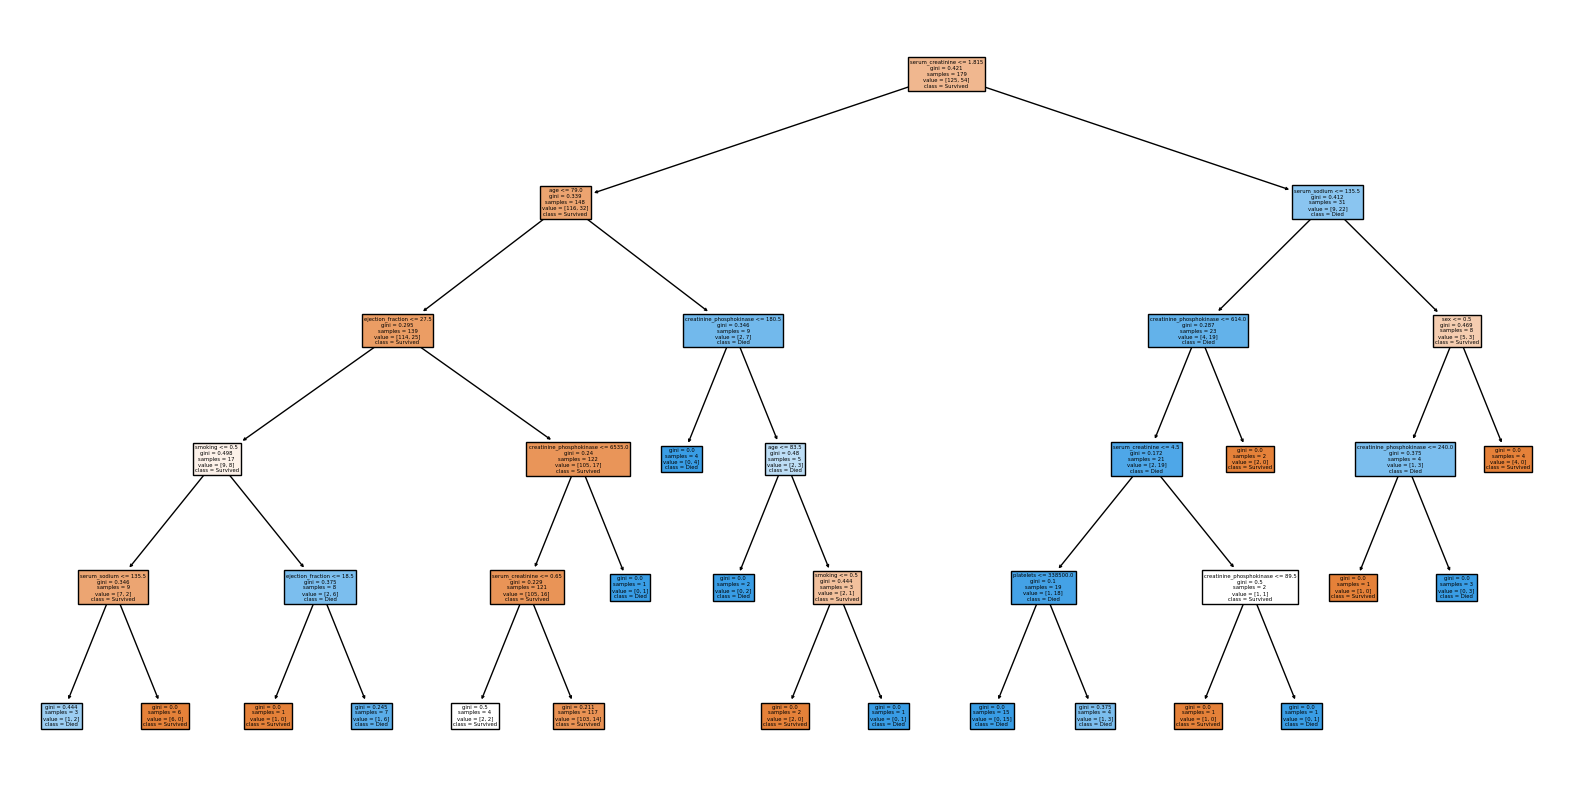

In [89]:
plt.figure(figsize=(20, 10))
plot_tree(DecisionTreeClassifier(max_depth=5).fit(X_train, y_train), 
          feature_names=X.columns, class_names=["Survived", "Died"], filled=True)
plt.show()

 Activation functions:  
 Binary - sigmoid  
 Multiclass - Softmax

Loss function:  
Binary - Binary cross-entropy  
Multiclass - Categorical cross-entropy